**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Regression

In [3]:

R_train = pd.read_csv("https://raw.githubusercontent.com/YiyangZhangyz738/Gas-Price/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/YiyangZhangyz738/Gas-Price/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [4]:
R_train.isna().sum()

theta               0
theta_past_ma10    10
dtype: int64

In [5]:
R_train=R_train.dropna()

In [6]:
R_test.isna().sum()

theta              0
theta_past_ma10    0
dtype: int64

In [7]:
R_train.head()

,theta,theta_past_ma10
10,0.006464,0.006801
11,0.005913,0.006632
12,0.006035,0.006393
13,0.006323,0.006303
14,0.007065,0.006307


In [8]:
R_test.head()

,theta,theta_past_ma10
1924,0.128029,0.118644
1925,0.124989,0.119394
1926,0.155090,0.120933
1927,0.167305,0.125466
1928,0.165133,0.131241


# Machine Learning Regression

## important global packages

In [9]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [10]:
R_train.head()

,theta,theta_past_ma10
10,0.006464,0.006801
11,0.005913,0.006632
12,0.006035,0.006393
13,0.006323,0.006303
14,0.007065,0.006307


In [11]:
X_train = pd.DataFrame(R_train['theta_past_ma10'])
y_train = pd.DataFrame(R_train['theta'])

In [12]:
R_test.head()

,theta,theta_past_ma10
1924,0.128029,0.118644
1925,0.124989,0.119394
1926,0.155090,0.120933
1927,0.167305,0.125466
1928,0.165133,0.131241


In [13]:
X_test = pd.DataFrame(R_test['theta_past_ma10'])
y_test = pd.DataFrame(R_test['theta'])

## Linear Regression

In [14]:
from sklearn import linear_model

In [15]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [16]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.2017309137760508


In [17]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.336989
1,0.337628
2,0.338936
3,0.342791
4,0.347701
...,...
957,0.648525
958,0.681828
959,0.714685
960,0.752125


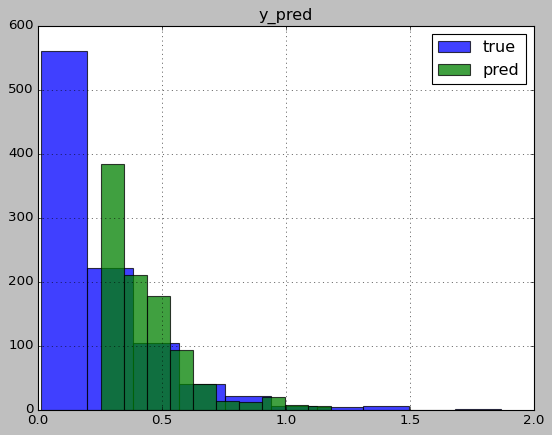

In [18]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-20-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [21]:
# calculate R2
from sklearn.metrics import r2_score

In [22]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.6677512656646512


In [23]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.126155
1,0.056485
2,0.138975
3,0.127685
4,0.480175
...,...
957,0.523123
958,0.323296
959,0.565385
960,1.178481


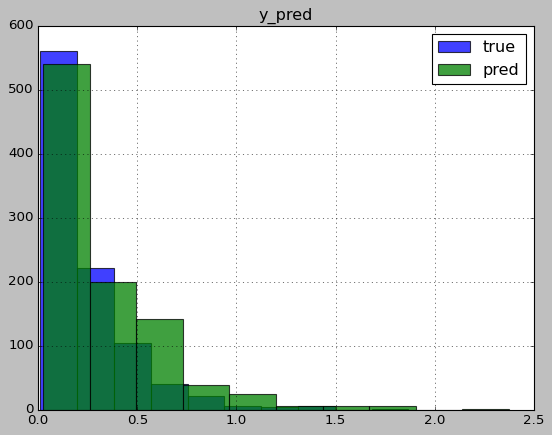

In [24]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
